In [1]:
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np
import pandas as pd
import scipy
from scipy.integrate import cumtrapz

import trfp
import gm2
import plotting_functions as plt2
import analysis_helper as helper
import helper_function_candidates as helper_old

Welcome to JupyROOT 6.12/04


In [4]:
tr_interp_df_1 = helper.root_to_pandas([3956], prefix='data1/newg2/DataProduction/Offline/ArtTFSDir/v9_20_00/FieldPlainRootOutput_', tr_run=True)
tr_moment_df_1 = helper.calc_moment_df(tr_interp_df_1)

Reading event 8780/8781 99.99%     
loop done: 100%                                    
Reading event 2630/2634 99.85%   
loop done: 100%                                    
Finished calculating all moments for 4386 events.


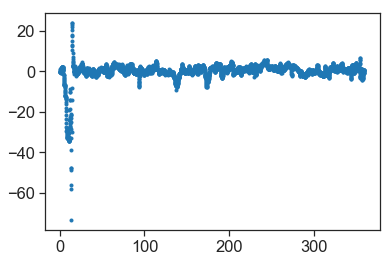

In [7]:
fig, ax = plt.subplots(1,1)

ax.plot(tr_moment_df_1['tr_phi'], tr_moment_df_1['tr,m2']/61.79, '.')

In [20]:
interp_phis = np.linspace(0.,360,1000)

interp_m2 = np.interp(interp_phis, tr_moment_df_1['tr_phi'], tr_moment_df_1['tr,m2']/61.79, period=360)

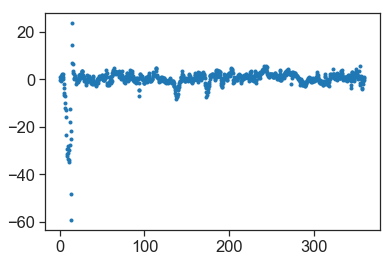

In [21]:
fig, ax = plt.subplots(1,1)

ax.plot(interp_phis, interp_m2, '.')

(0, 40)

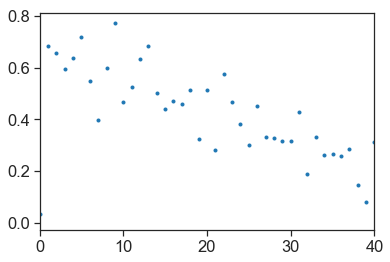

In [24]:
plt.plot(np.abs(np.fft.fft(interp_m2))/1000, '.')
ax = plt.gca()

ax.set_xlim(0,40)

In [25]:
np.abs(np.fft.fft(interp_m2)[0])/1000

0.03426782864854584

In [26]:
np.abs(np.fft.fft(interp_m2)[1])/1000

0.6849452583176542

In [ ]:
## check % of data flags in 9 day

runs = gm2.FixedProbe(range(4229,4263), prefix='data1/newg2/DataProduction/Offline/ArtTFSDir/v9_20_00/FieldPlainRootOutput_')
fp_time, fp_freq, fp_qual = runs.getBasics()

In [11]:
fp_time = fp_time[1:,:]/1.0e9  # convert nsec to sec
fp_freq = fp_freq[1:,:]
fp_qual = fp_qual[1:,:]

In [10]:
fp_time_2 = fp_time[1:,:].copy()
fp_freq_2 = fp_freq[1:,:].copy()
fp_qual_2 = fp_qual[1:,:].copy()

In [12]:
fp_qual_2[fp_qual_2 >= 2**16] -= 2**16
fp_qual_2[fp_qual_2 >= 2**8] -= 2**8

In [7]:
print fp_qual.size

52956288


In [10]:
print float(fp_qual[fp_qual>0].size)/fp_qual.size

0.00582372767517


In [14]:
print np.mean(fp_qual_2[:,124])

0.0


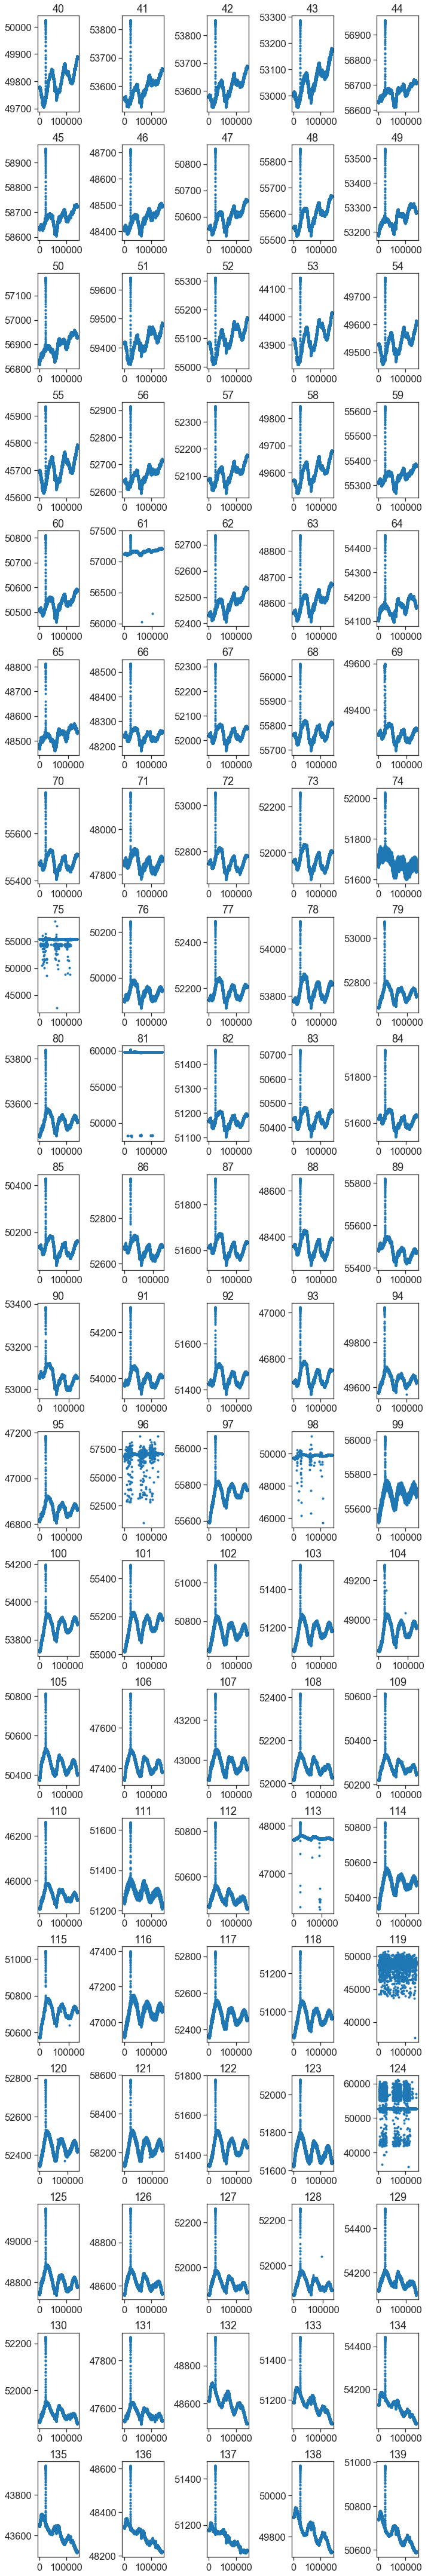

In [6]:
fig, axs = plt.subplots(20,5)

for i in range(20):
    for j in range(5):
        pr = 40 + 5*i + j
        axs[i,j].plot(fp_freq_2[:,pr][fp_qual_2[:,pr]==0], '.')
        axs[i,j].set_title(str(pr))
        
fig.set_size_inches(10,60)
fig.tight_layout()